In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = [ 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
def plot_sample(X, y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

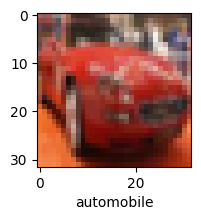

In [11]:
plot_sample(X_train, y_train, 5)

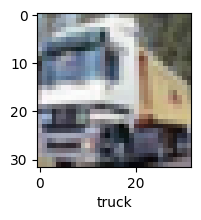

In [12]:
plot_sample(X_train, y_train, 1)

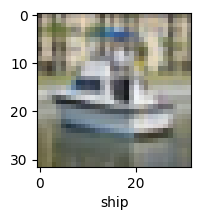

In [13]:
plot_sample(X_train, y_train, 501)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(300, activation = 'relu'),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 21s 12ms/step - loss: 1.8757 - accuracy: 0.3279
Epoch 2/5
1563/1563 [==============================] - 13s 9ms/step - loss: 1.6924 - accuracy: 0.4000
Epoch 3/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6133 - accuracy: 0.4290
Epoch 4/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5582 - accuracy: 0.4465
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5138 - accuracy: 0.4644


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.37      0.74      0.49      1000
           1       0.56      0.57      0.56      1000
           2       0.34      0.37      0.35      1000
           3       0.39      0.19      0.25      1000
           4       0.56      0.17      0.26      1000
           5       0.33      0.48      0.39      1000
           6       0.51      0.53      0.52      1000
           7       0.52      0.53      0.52      1000
           8       0.67      0.39      0.50      1000
           9       0.51      0.52      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.44     10000
weighted avg       0.48      0.45      0.44     10000



In [17]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

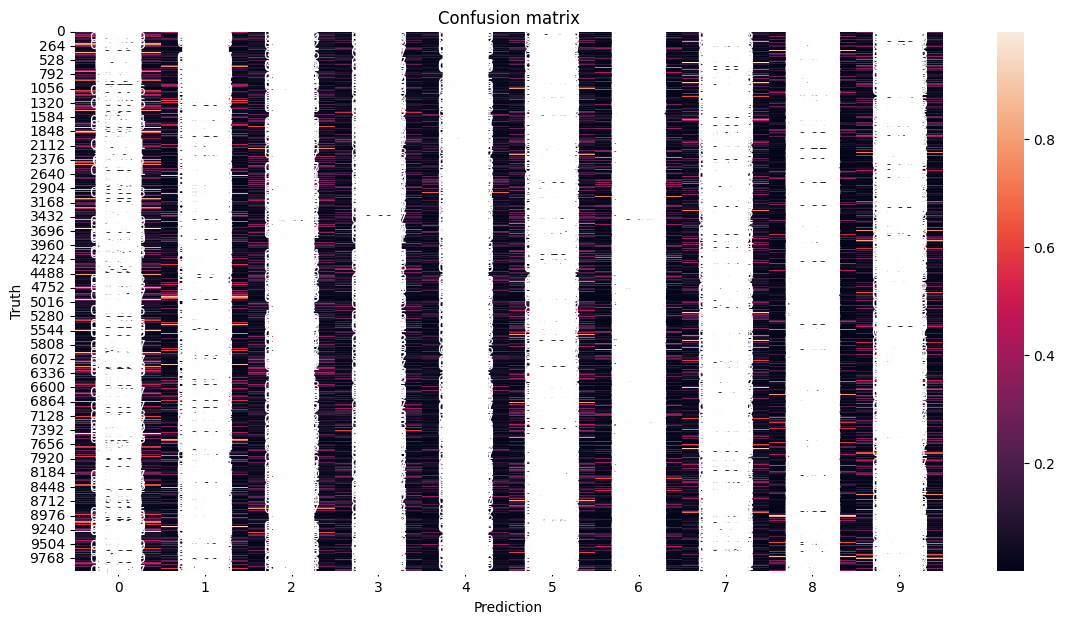

In [18]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [19]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 39ms/step - loss: 1.4150 - accuracy: 0.4903
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0773 - accuracy: 0.6229
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.9522 - accuracy: 0.6683
Epoch 4/10
1563/1563 [==============================] - 59s 37ms/step - loss: 0.8557 - accuracy: 0.7032
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.7815 - accuracy: 0.7296
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7200 - accuracy: 0.7500
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6652 - accuracy: 0.7692
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6201 - accuracy: 0.7824
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.5736 - accuracy: 0.7996
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [22]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9407 - accuracy: 0.7079


[0.9406828880310059, 0.7078999876976013]

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 11ms/step


array([[3.60511476e-05, 3.51440207e-07, 3.93353123e-03, 9.08486664e-01,
        9.64917708e-04, 2.00701226e-02, 6.26910329e-02, 2.53410926e-05,
        3.77901434e-03, 1.28889387e-05],
       [3.35464347e-03, 8.43540728e-01, 2.39294273e-08, 2.57879301e-10,
        7.75579947e-11, 9.93302337e-13, 1.67555803e-10, 2.60945328e-11,
        1.52896985e-01, 2.07581150e-04],
       [4.89522219e-01, 1.69429168e-01, 1.54080312e-03, 8.42803065e-03,
        1.57230490e-04, 1.98220281e-04, 3.90936737e-04, 1.76882297e-02,
        2.00727940e-01, 1.11917116e-01],
       [9.60779667e-01, 8.37208470e-04, 9.45028383e-04, 1.06306725e-04,
        1.17326090e-02, 1.77645927e-06, 6.17463957e-04, 7.89443366e-05,
        2.48303358e-02, 7.05483399e-05],
       [6.62372768e-10, 1.10956940e-07, 2.72649690e-03, 2.98446976e-04,
        4.74373549e-02, 3.24813591e-05, 9.49504733e-01, 5.61169919e-08,
        2.30313020e-07, 7.67530983e-10]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 0, 0, 6]

In [25]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

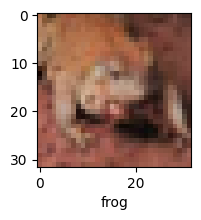

In [26]:
plot_sample(X_test, y_test, 5)

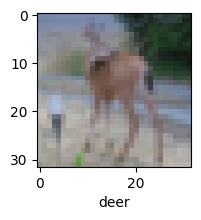

In [27]:
plot_sample(X_test, y_test, 100)

In [28]:
classes[y_classes[60]]

'horse'